### Project: Understanding Employee Attrition with Machine Learning 
### Activity: Data Cleaning and Exploratory Data Analysis 
### Author: Tawanda Nigel Chitapi
### Email: nigel.chitapi@gmail.com    
### Date: September 05, 2022
### Institution: BrainStation

##### The purpose of this project seeks to understand employee attrition within an organization. The dataset used in this analysis is synthetic data created by IBM Data Scientists for the purposes of HR Analytics. The data was tailored to represent helthcare workers.  

##### This notebook will primarily focus on data cleaning and exploratory data analysis to better understand the various factors that potentially influence employee attrition. The target **'y'** variable is "Attrition".

##### After cleaning the data and conducting exhaustive exploratoty analysis, Machine Learning models will be explored in separate notebooks. 

In [1]:
# first we will load in the primary python library packages we use most often 

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm 

In [2]:
# load in the data 

data_df = pd.read_csv('data/watson_healthcare_modified.csv')

In [3]:
# sanity check to see if the data has loaded successfully

data_df.head(10)

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
5,1633361,32,No,Travel_Frequently,1005,Maternity,2,2,Life Sciences,1,...,3,80,0,8,2,2,7,7,3,6
6,1329390,59,No,Travel_Rarely,1324,Maternity,3,3,Medical,1,...,1,80,3,12,3,2,1,0,0,0
7,1699288,30,No,Travel_Rarely,1358,Maternity,24,1,Life Sciences,1,...,2,80,1,1,2,3,1,0,0,0
8,1469740,38,No,Travel_Frequently,216,Maternity,23,3,Life Sciences,1,...,2,80,0,10,2,3,9,7,1,8
9,1101291,36,No,Travel_Rarely,1299,Maternity,27,3,Medical,1,...,2,80,2,17,3,2,7,7,7,7


In [4]:
# check the shape of the data
data_df.shape

(1676, 35)

The data consists of 1676 rows and 35 columns. The dataset is not significantly large in the world data, this is to say, this dataset is not regarded as Big Data. Having said this, it is fair to assume that the data set would be representative of hospital employees at a significantly large hospital, and so we will assume that we working on case of hospital employees.

In [5]:
#check the structure of the data 
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

The data types included are of object and integer type. Object type refers to 'strings' or 'words' in general terms and the integer type referes to 'whole numbers'. 

In [6]:
# check for any null values in the dataset

data_df.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are zero null values, this means that all data records (rows) contain data points from all the respective columns in the dataset

In [7]:
# check for any duplicated rows

duplicate_rows = data_df.duplicated().sum()

print(f'There are {duplicate_rows} duplicate rows')

There are 0 duplicate rows


In [8]:
# check number of duplicate columns 

duplicate_columns = data_df.T.duplicated().sum()

print(f'There are {duplicate_columns} duplicate rows')

There are 0 duplicate rows


No rows or columns have been duplicated. Each row and column is unique and does not cointain duplicate data from another row or columns nor do the columns have the same name as that of another column.

Our data appears to be considerably clean at least on a high level after conducting the fundamental data cleaning basic checks. We will now move on to conduct exploratory data analysis on the dataset. 

During this process we may encounter more in depth information about the data that may induce us to conduct further data cleaning in addition to what we have already done. 


This may include some degree of feature engineering, but first we will separate our data into numeric data **'number'** and categorical data **'object'** groups, in order to conduct exploratory data analysis as they require different methods of analysis 

In [9]:
#separate the numeric and categorical columns 

numeric_col_list = list(data_df.select_dtypes("number").columns)

categorical_col_list = list(data_df.select_dtypes("object").columns)



In [10]:
# sanity check to see if the data has been successfully separated 

print(numeric_col_list)

['EmployeeID', 'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [11]:
# sanity check to see if the data has been successfully separated 

print(categorical_col_list)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


Now that our data has been cleaned up, we will now conduct some exploratory data analysis to better understand the how the various features influence employee attrition. 

### EDA - Exploratory Data Analysis

Defined, Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.


It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand,before getting them dirty with it.

First we will begin with Univariate analysis of the numerical data. Univariate means we will be analyzing the numeric data columns individually to try and investigate how the data in each column inferes about employees and make assumptions of the inferences it might have our target feature (variable.)


#### Univariate analysis for numeric variables (numerical features)

In [12]:
df_numeric = data_df[numeric_col_list].copy()
df_numeric.head()

,EmployeeID,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,1102,1,2,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,279,8,1,1,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,1373,2,2,1,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,1392,3,4,1,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,591,2,1,1,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


Pre-processing the numeric columns we will check the distributions if they are skewed or normal and visually inspect the data for outliers.

We will use a seaborn pairplot to achieve this.

The seaborn pairplot will give us a give look of the data and potential problems with correlations. The diagonal gives the histograms for the columns and the other tiles show scatter plots between the two variables.

In [13]:
#sns.pairplot(df_numeric)
#plt.show()

Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement 
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction 
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating 
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction 
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance 
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

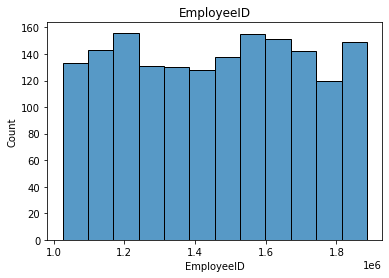

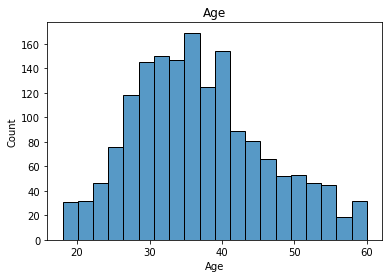

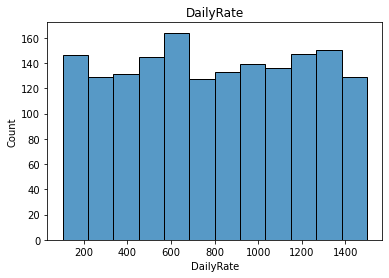

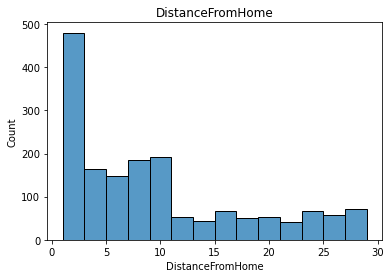

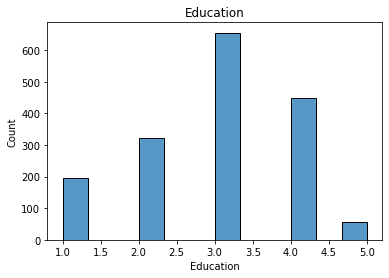

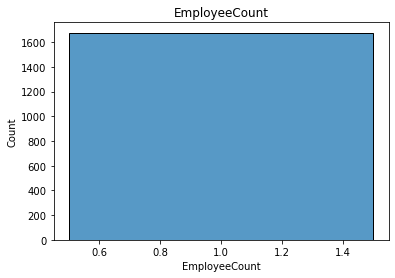

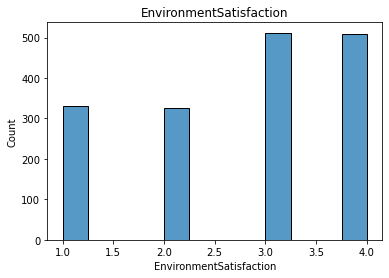

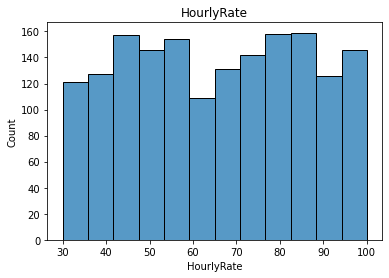

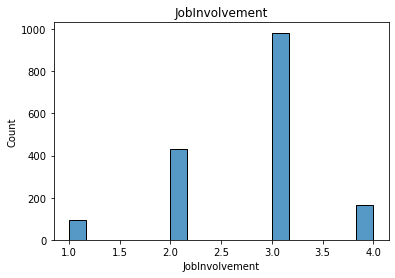

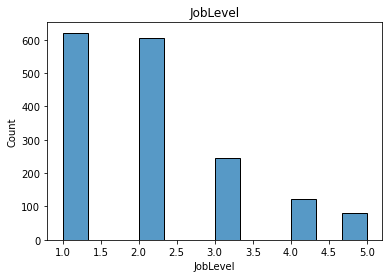

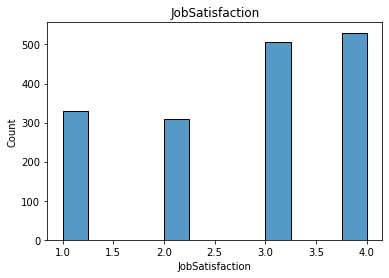

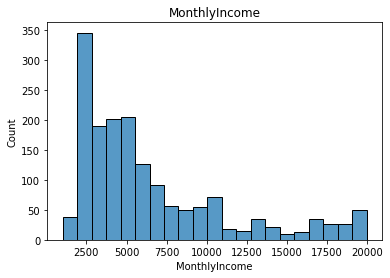

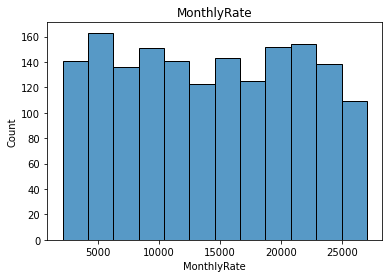

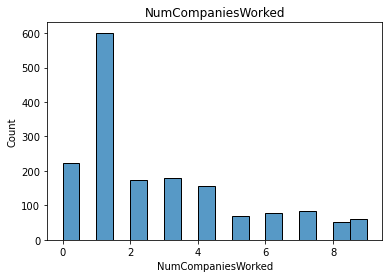

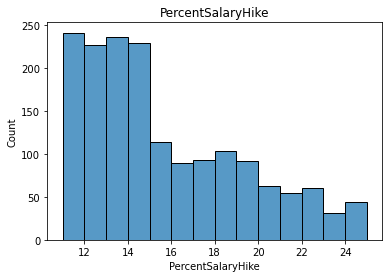

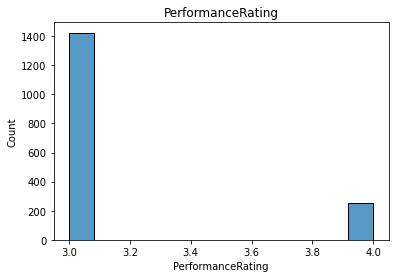

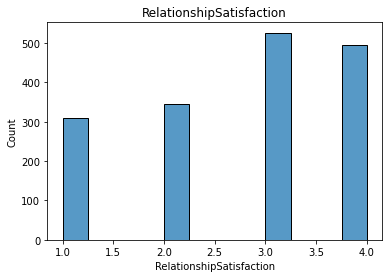

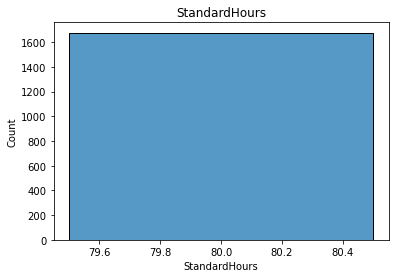

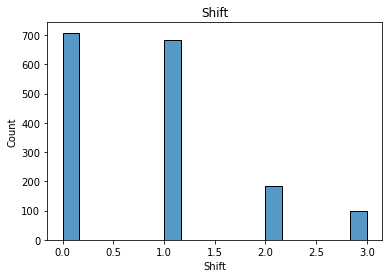

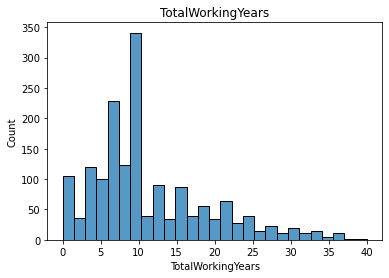

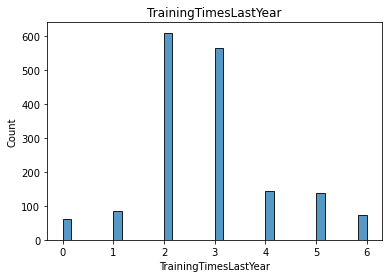

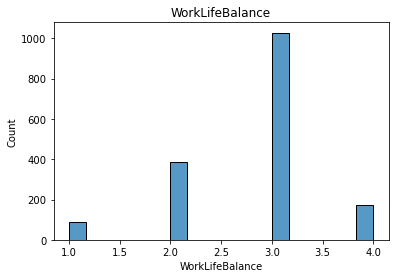

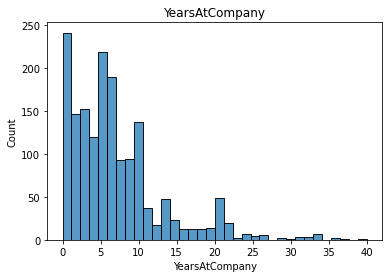

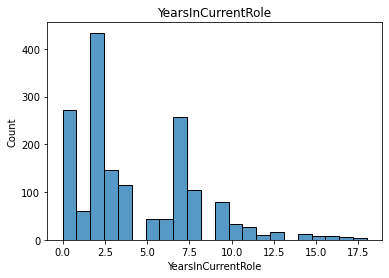

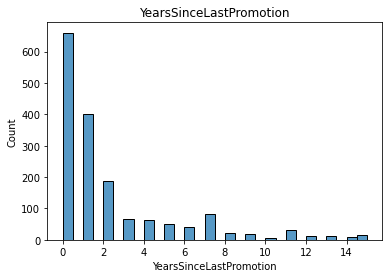

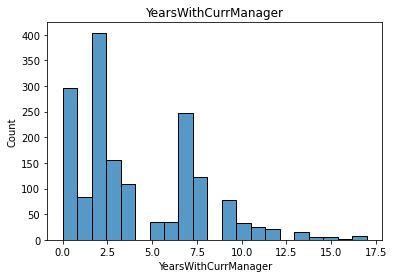

In [14]:
for column in df_numeric.columns:
    sns.histplot(x=column, data=df_numeric)
    plt.title(column)
    plt.show()

The EmployeeID has not impact whatsoever on target variable nor does it tell us any significant information about the employee other than their unique identification number

The age of employees is normally distributed, with most of the employees aged between 25 years and 50 years

The daily rate for employees ranges from ($200 - $1400), we can assume that employees with more experience, more years on the job, higher education are paid more, this can be further verified when we test for correlations

Distance from home has a right skewed distribution, most employees do not live to far from their place of work, 'the hospital', most employees stay within 10km of the hospital

Most employees hold a bachelor’s degree followed by those with a master’s degree, less than 200 employees do not have college level education and less than 100 employees hold Doctorate degrees 

About 50% of the employees are satisfied with their job environment satisfaction as they have rated it as 'high' and 'very high'

The hourly rate ranges from ($30/hr - $100/hr), we can assume that employees with more experience, more years on the job, higher education are paid more, this can be further verified when we test for correlations

Many employees are highly involved in their job, with this we can assume that their input and participation is highly valued resulting in employees being encouraged to be more involved, this may vary with department and job role.

The job level chart is right skewed, and this suggests that most of the employees are enrolled in lower lever jobs compared to higher level jobs 

Monthly Income ranges from ($1250 - $20000) the graph is also right skewed, which suggests that most employees earn a monthly income on the lower and few employees earn monthly income on the higher end. This can be related to job level as we have assumed above

Most employees have worked for fewer companies in their career and very few have worked for more than 5 companies. Those that have worked for less companies may be part of the group that has been with the hospital for fewer years that they have not had the opportunity to change jobs, or they may be part of the group that has worked for the hospital for many years and have not switched companies.

The Percent Salary Hike graph ranges from 12% to 24% and it is also right skewed, this suggests that most employees receive a lower percentage pay increase and very few receive a high percentage pay increase. we can assume that the higher percentage pay increase hikes are associated with higher level jobs as they possibly undertake more intricate jobs that involve high risk and provide high rewards in return

Employees are overall satisfied with their work relationships, most of the employees have been working for at least 10 years of their career and this mostly translates to most of them having worked at the hospital for between 0 and 10 years, we can assume that most employees enjoy and love their work and place of work thus they do not move away in large numbers


### Now we will move on to conducting a univariate analysis on the categorical features

#### Univariate analysis on categorical variables (categorical features)

In [15]:
# sanity check to see the categorical columns 
print(categorical_col_list)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [16]:
# check the categorical data only dataframe
df_categorical = data_df[categorical_col_list].copy()
df_categorical.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,No,Travel_Rarely,Cardiology,Life Sciences,Female,Nurse,Single,Y,Yes
1,No,Travel_Frequently,Maternity,Life Sciences,Male,Other,Married,Y,No
2,Yes,Travel_Rarely,Maternity,Other,Male,Nurse,Single,Y,Yes
3,No,Travel_Frequently,Maternity,Life Sciences,Female,Other,Married,Y,Yes
4,No,Travel_Rarely,Maternity,Medical,Male,Nurse,Married,Y,No


In [17]:
# check 
data_df['Attrition'].value_counts()

No     1477
Yes     199
Name: Attrition, dtype: int64

88% of employees stayed on the job and 12% quit. The classes are extremely imbalanced, the data will have to been upsampled in order to improve model training and model performance 

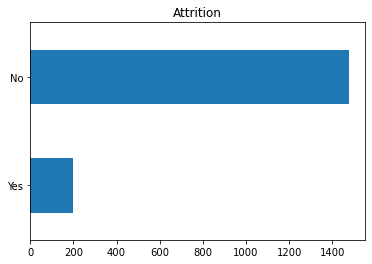

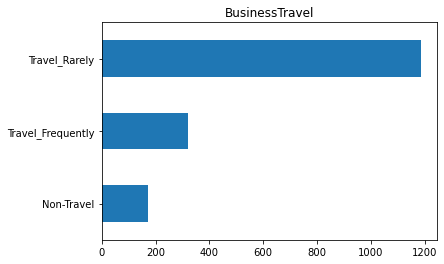

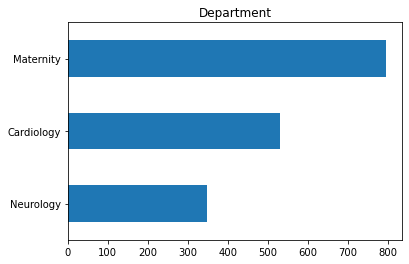

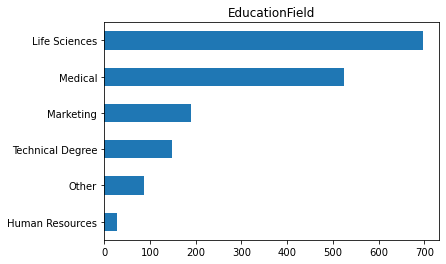

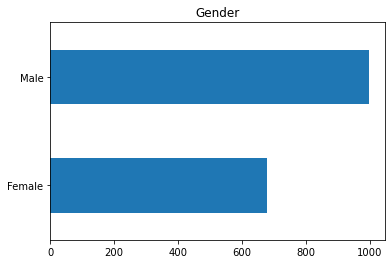

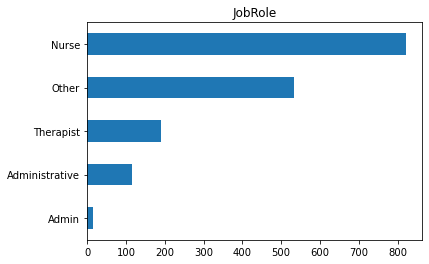

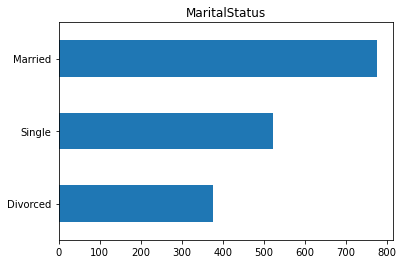

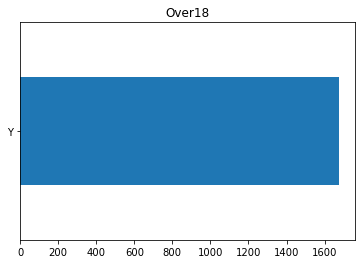

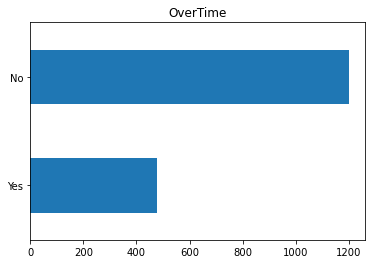

In [18]:
#Pull out the category (i.e. object information only)
categorical_df = data_df.select_dtypes('object')

#Iterate through all my object datatype columns
for column in categorical_df:

#Plot my results
    categorical_df[column].value_counts().sort_values().plot(kind='barh')
    plt.title(column)
    plt.show()

Analyzing the above, we can learn:

•	Most employees rarely travel for business, this is about 75% of the employees
•	The department most represented at the hospital is the Maternity department, followed by the cardiology department, and lastly the Neurology department
•	Most employees come from the Life Sciences education field, followed by the medical education field, this is quite representative of a hospital environment. Most of the employees hail from the Marketing, Technical Degree, Other and Human Resources
•	Employees at the hospital are predominantly male, making up about a 1000 of the 1676 employees
•	The most populated Job Role is that of a Nurse, followed by Other, then Therapist, followed by Administrative and Admin. In this instance I will assume that Administrative and Admin are the same and so I will join the two classes
•	Most employees are Married about 800 of them followed by Single ones and lastly a fair share of those who are divorced, just under 400 of them.
•	All employees at the hospital are over the age of 18
•	A significant number of employees do not work over-time at the hospital. About 500 employees worked overtime. This may vary due to different departments and staff demand in the respective departments. so, department may not necessarily have to work over-time. I would assume that the administrative department does not work as much over time as the nurses would. This can be further explored to get a true reflection of which employees mostly work over-time and which ones do not


#### Bivariate analysis on categorical variables (categorical features) against the target variable "Attrition"

The Bivariate analysis investigates the relation between each categorial variable and the target variable to help us understand the two classes of the Attrition variable, we want to better understand the behavior traits of those who quit and left their jobs vs those that have continued to remain on the job

**Employees that left their job are marked by "yes" and those that remained are marked by "yes"**

In [19]:
#Check the relationship of the BusinessTravel column with our target. 

total_count = df_categorical.groupby(['BusinessTravel', 'Attrition'])['BusinessTravel'].count()
pct_Business_Travel = total_count/df_categorical.groupby('BusinessTravel')['BusinessTravel'].count()

pct_Business_Travel = pct_Business_Travel.unstack()
#we will restack these to plot the chart
pct_Business_Travel.columns = ['no', 'yes']
pct_Business_Travel.index = ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']

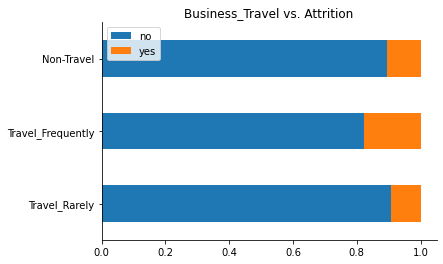

In [20]:
#Plot the above
pct_Business_Travel.plot(kind='barh', stacked=True)
sns.despine()
plt.title("Business_Travel vs. Attrition")
plt.show()

Most employees that left their job traveled quite frequently, business travel may be assumed to have adversing affect the employees overall job satisfation

In [21]:
#Check the relationship of the Department column with our target. 


total_count = df_categorical.groupby(['Department', 'Attrition'])['Department'].count()
pct_Business_Travel = total_count/df_categorical.groupby('Department')['Department'].count()

pct_Business_Travel = pct_Business_Travel.unstack()
#we will restack these to plot the chart
pct_Business_Travel.columns = ['no', 'yes']
pct_Business_Travel.index = ['Maternity', 'Cardiology', 'Neurology']

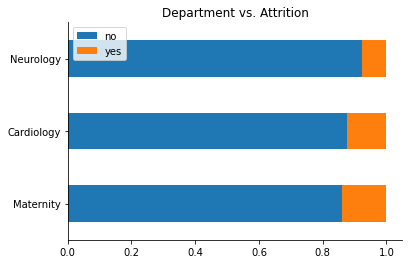

In [22]:
#Plot the above
pct_Business_Travel.plot(kind='barh', stacked=True)
sns.despine()
plt.title("Department vs. Attrition")
plt.show()

Most employees that left their job came mostly from the Maternity department, followed by Cardiology and Neurology respectively. The Maternity department tends to be very busy and demaning and so it is safe to assume that employees that left had worked there for a longtime and could not handle the pressures of the department 

In [23]:
#Check the relationship of the EducationField column with our target
total_count = df_categorical.groupby(['EducationField', 'Attrition'])['EducationField'].count()
pct_Business_Travel = total_count/df_categorical.groupby('EducationField')['EducationField'].count()

pct_Business_Travel = pct_Business_Travel.unstack()
#we will restack these to plot the chart
pct_Business_Travel.columns = ['no', 'yes']
pct_Business_Travel.index = ['Life Sciences', 'Medical', 'Marketing', 'Technical Degree',
                             'Other','Human Resources']

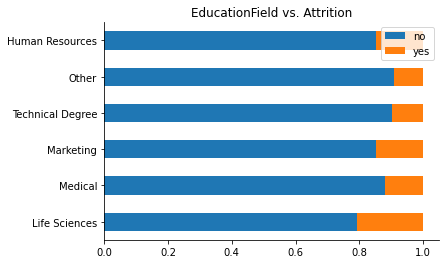

In [24]:
#Plot the above
pct_Business_Travel.plot(kind='barh', stacked=True)
sns.despine()
plt.title("EducationField vs. Attrition")
plt.show()

Most employees that quit their jobs had a Life Sciences educational background followed by Markerting, Human Resources and Medical

In [25]:
#Check the relationship of the Gender column with our target
total_count = df_categorical.groupby(['Gender', 'Attrition'])['Gender'].count()
pct_Business_Travel = total_count/df_categorical.groupby('Gender')['Gender'].count()

pct_Business_Travel = pct_Business_Travel.unstack()
#we will restack these to plot the chart
pct_Business_Travel.columns = ['no', 'yes']
pct_Business_Travel.index = ['Male', 'Female']

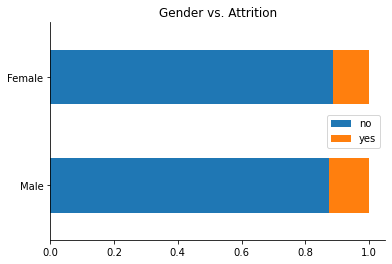

In [26]:
#Plot the above
pct_Business_Travel.plot(kind='barh', stacked=True)
sns.despine()
plt.title("Gender vs. Attrition")
plt.show()

A similar amount of male and female employees quit their job, almost male employees were slightly more, this might be infulenced by the fact that overall, the hospital is dominated by male employees with regards to total numbers

In [96]:
#Check the relationship of the JobRole column with our target

total_count = df_categorical.groupby(['JobRole', 'Attrition'])['JobRole'].count()
pct_Business_Travel = total_count/df_categorical.groupby('JobRole')['JobRole'].count()

pct_Business_Travel = pct_Business_Travel.unstack()
#we will restack these to plot the chart
pct_Business_Travel.columns = ['no', 'yes']
pct_Business_Travel.index = ['Nurse', 'Other', 'Therapist', 'Administrative', 'Care']

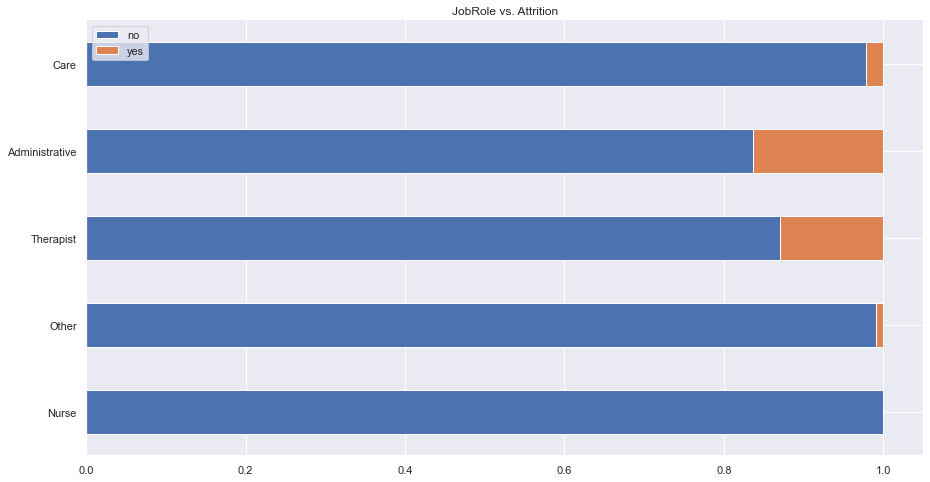

In [97]:
#Plot the above
pct_Business_Travel.plot(kind='barh', stacked=True)
sns.despine()
plt.title("JobRole vs. Attrition")
plt.show()

A significant amount of people that quit thier jobs were enrolled in Adminstrative work followed by Therapist

In [29]:
#Check the relationship of the MaritalStatus column with our target

total_count = df_categorical.groupby(['MaritalStatus', 'Attrition'])['MaritalStatus'].count()
pct_Business_Travel = total_count/df_categorical.groupby('MaritalStatus')['MaritalStatus'].count()

pct_Business_Travel = pct_Business_Travel.unstack()
#we will restack these to plot the chart
pct_Business_Travel.columns = ['no', 'yes']
pct_Business_Travel.index = ['Married', 'Single', 'Divorced']

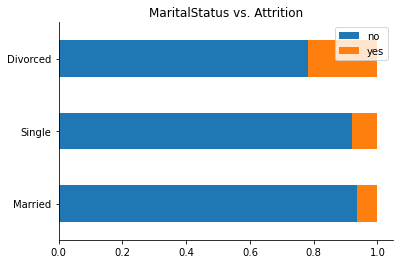

In [30]:
#Plot the above
pct_Business_Travel.plot(kind='barh', stacked=True)
sns.despine()
plt.title("MaritalStatus vs. Attrition")
plt.show()

The majority of employees that left their jobs were Divorced followed by a similar amount of Single and Married employees. 

In [31]:
#Check the relationship of the OverTime column with our target

total_count = df_categorical.groupby(['OverTime', 'Attrition'])['OverTime'].count()
pct_Business_Travel = total_count/df_categorical.groupby('OverTime')['OverTime'].count()

pct_Business_Travel = pct_Business_Travel.unstack()
#we will restack these to plot the chart
pct_Business_Travel.columns = ['no', 'yes']
pct_Business_Travel.index = ['Yes', 'No']

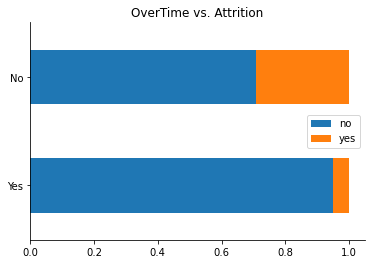

In [32]:
#Plot the above
pct_Business_Travel.plot(kind='barh', stacked=True)
sns.despine()
plt.title("OverTime vs. Attrition")
plt.show()

Surprisingly, the majority of employees that quit their jobs did not neccessarily work over-time. An easy assumption may have been that, employees quit their jobs after working ong hours and burning out, however, this is not the case.

In [33]:
#Check the relationship of the Over18 column with our target

total_count = df_categorical.groupby(['Over18', 'Attrition'])['Over18'].count()
pct_Business_Travel = total_count/df_categorical.groupby('Over18')['Over18'].count()

pct_Business_Travel = pct_Business_Travel.unstack()
#we will restack these to plot the chart
pct_Business_Travel.columns = ['no', 'yes']
pct_Business_Travel.index = ['Yes']

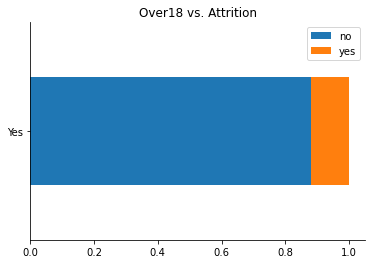

In [34]:
#Plot the above
pct_Business_Travel.plot(kind='barh', stacked=True)
sns.despine()
plt.title("Over18 vs. Attrition")
plt.show()

All employees that work at the hospital are above the age of 18 and so all employees that quit their jobs were over 18 years of age

### Correlation of numerical features

It is important to assess for correlation of numerical features in order to understand how the variables relate with each other and most importantly if any variables are strongly correlated, it is important to take note of them and try to avaoid to use them both to predict the target variable. The numerical variables are part of the indepedent variables and so they should be indepedent of each other in order to best predict the target variables.

In [35]:
# calculate correlation of numerical variables
data_df.corr()

,EmployeeID,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeID,1.000000,-0.039033,-0.002558,-0.031648,-0.000781,NaN,-0.005930,0.000007,-0.062473,-0.030085,...,-0.000650,NaN,-0.003884,-0.031294,0.014934,0.033284,-0.018060,-0.014384,0.031340,-0.013707
Age,-0.039033,1.000000,0.001441,-0.010079,0.204655,NaN,0.008945,0.034671,0.034193,0.518333,...,0.058528,NaN,0.037117,0.692512,-0.015408,-0.004878,0.319012,0.222655,0.217212,0.215909
DailyRate,-0.002558,0.001441,1.000000,-0.009227,-0.015881,NaN,0.010620,0.027128,0.058864,0.009005,...,0.014539,NaN,0.054407,0.009378,0.001901,-0.028549,-0.026892,0.019651,-0.034571,-0.025272
DistanceFromHome,-0.031648,-0.010079,-0.009227,1.000000,0.015937,NaN,-0.019730,0.026947,0.010281,-0.023455,...,0.005482,NaN,0.029180,-0.017663,-0.055471,-0.037821,-0.007420,0.011448,-0.000126,0.000403
Education,-0.000781,0.204655,-0.015881,0.015937,1.000000,NaN,-0.031925,0.017996,0.041046,0.093227,...,-0.005750,NaN,0.024451,0.143324,-0.014070,0.003933,0.057461,0.051029,0.045785,0.055096
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnvironmentSatisfaction,-0.005930,0.008945,0.010620,-0.019730,-0.031925,NaN,1.000000,-0.057505,-0.007220,0.008277,...,0.003221,NaN,0.005283,0.000208,-0.017722,0.027262,-0.000448,0.012241,0.005866,-0.012417
HourlyRate,0.000007,0.034671,0.027128,0.026947,0.017996,NaN,-0.057505,1.000000,0.034741,-0.018830,...,0.000601,NaN,0.051862,0.005988,-0.007194,-0.009956,-0.014742,-0.016776,-0.028642,-0.021436
JobInvolvement,-0.062473,0.034193,0.058864,0.010281,0.041046,NaN,-0.007220,0.034741,1.000000,-0.013660,...,0.045107,NaN,0.025999,-0.001576,-0.031580,-0.006931,-0.013652,0.020541,-0.022153,0.031574
JobLevel,-0.030085,0.518333,0.009005,-0.023455,0.093227,NaN,0.008277,-0.018830,-0.013660,1.000000,...,0.030606,NaN,0.010478,0.780929,-0.004251,0.047481,0.532529,0.387624,0.343102,0.379717


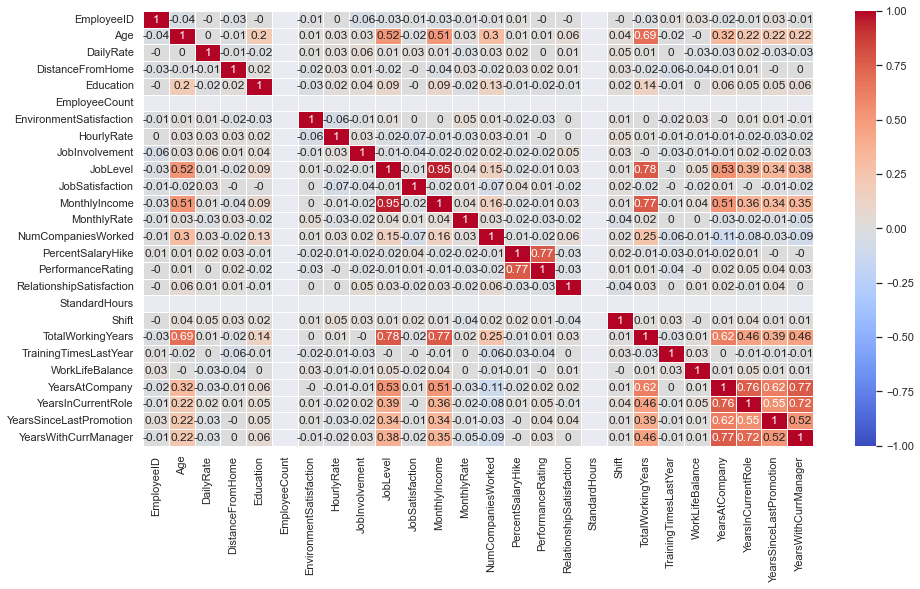

In [36]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data_df.corr().round(2), vmin=-1, vmax=1, cmap='coolwarm', annot=True, linewidths=1)
plt.show()

From the Correlation heatmap above we observe the following:

- MonthlyIncome is strongly correlated with correlated with JobLevel
- JobLevel is strongly correlated with TotalWorkingYears
- MonthlyIncome is strongly correlated with TotalWorkingYears
- PercentSalaryHike is strongly correlated with PerfomanceRating 
- Age is strongly correlated with TotalWorkingYears
- YearsWithCurrManager is strongly correlated with YeasAtCompany 
- YearsInCurrentRole is strongly correlated with YearsAtCompany

### End of Exploratory Data Analysis



In order to solve our classification problem we need to convert all categorical columns 'object columns' in numerical columns. There are two options we could explore to achive this. For columns that have multiple classes that are not in any ordinal order we will use the 'One Hot Encoder' method and for columns that have multiple classes that are ordinal we will use the 'Ordinal Encoder' method.

We will go on to check the type of classes contained in each of the 9 object columns in our database.



In [37]:
# first we will check the classes contained in our target dependent variable which is Attrition

data_df['Attrition'].unique()




array(['No', 'Yes'], dtype=object)

In [38]:
# Binarize Attrition classes

data_df['Attrition'] = np.where(data_df['Attrition'] == 'Yes', 1, 0)

#check if the classes have successfully binarized
data_df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,0,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,0,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,1,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,0,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,0,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


## Now we will move on the BusinessTravel Column

In [39]:
# first we will import the one hot encoder package from scikit learn

from sklearn.preprocessing import OneHotEncoder

In [40]:
data_df['BusinessTravel'].unique()



array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [41]:
# Instantiate the OneHotEncoder
ohe = OneHotEncoder()
# It expects a 2D array, so we first convert the column into a DataFrame
Business_Travel = pd.DataFrame(data_df['BusinessTravel'])

# Fit the OneHotEncoder to the subcategory column and transform
encoded_bt = ohe.fit_transform(Business_Travel)
encoded_bt

<1676x3 sparse matrix of type '<class 'numpy.float64'>'
	with 1676 stored elements in Compressed Sparse Row format>

_bt refers to BusinessTravel

In [42]:
# Convert from sparse matrix to dense
dense_array_bt = encoded_bt.toarray()
dense_array_bt

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [43]:
ohe.categories_

[array(['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], dtype=object)]

In [44]:
# Put into a dataframe to get column names
encoded_bt_df = pd.DataFrame(dense_array_bt, columns=ohe.categories_[0] , dtype=int)

# Show
encoded_bt_df.head()




,Non-Travel,Travel_Frequently,Travel_Rarely
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


In [45]:

# no we will add the encoded columns into the main data frame
data_df2 = pd.concat([data_df, encoded_bt_df], axis=1)

# sanity check to see if columns have been added successfully
data_df2

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely
0,1313919,41,0,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,8,0,1,6,4,0,5,0,0,1
1,1200302,49,0,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,10,3,3,10,7,1,7,0,1,0
2,1060315,37,1,Travel_Rarely,1373,Maternity,2,2,Other,1,...,7,3,3,0,0,0,0,0,0,1
3,1272912,33,0,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,8,3,3,8,7,3,0,0,1,0
4,1414939,27,0,Travel_Rarely,591,Maternity,2,1,Medical,1,...,6,3,3,2,2,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,1,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,1,3,1,1,0,0,0,0,0,1
1672,1152327,46,0,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,15,3,3,3,2,1,2,0,0,1
1673,1812428,20,0,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,1,0,4,1,0,0,0,0,0,1
1674,1812429,39,0,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,21,3,3,21,6,11,8,0,0,1


In [46]:
# drop the original BusinessTravel column
data_df2 = data_df2.drop(['BusinessTravel'], axis = 1)

In [47]:
# sanity check to see if the BusinessTravel column has been dropped successfully
data_df2

,EmployeeID,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely
0,1313919,41,0,1102,Cardiology,1,2,Life Sciences,1,2,...,8,0,1,6,4,0,5,0,0,1
1,1200302,49,0,279,Maternity,8,1,Life Sciences,1,3,...,10,3,3,10,7,1,7,0,1,0
2,1060315,37,1,1373,Maternity,2,2,Other,1,4,...,7,3,3,0,0,0,0,0,0,1
3,1272912,33,0,1392,Maternity,3,4,Life Sciences,1,4,...,8,3,3,8,7,3,0,0,1,0
4,1414939,27,0,591,Maternity,2,1,Medical,1,1,...,6,3,3,2,2,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,1,471,Neurology,24,3,Technical Degree,1,3,...,1,3,1,1,0,0,0,0,0,1
1672,1152327,46,0,1125,Cardiology,10,3,Marketing,1,3,...,15,3,3,3,2,1,2,0,0,1
1673,1812428,20,0,959,Maternity,1,3,Life Sciences,1,4,...,1,0,4,1,0,0,0,0,0,1
1674,1812429,39,0,466,Neurology,1,1,Life Sciences,1,4,...,21,3,3,21,6,11,8,0,0,1


## Now we will move on the Department Column

In [48]:
data_df2['Department'].unique()

array(['Cardiology', 'Maternity', 'Neurology'], dtype=object)

In [49]:
# Instantiate the OneHotEncoder
ohe = OneHotEncoder()
# It expects a 2D array, so we first convert the column into a DataFrame
Department = pd.DataFrame(data_df2['Department'])

# Fit the OneHotEncoder to the subcategory column and transform
encoded_d = ohe.fit_transform(Department)
encoded_d

<1676x3 sparse matrix of type '<class 'numpy.float64'>'
	with 1676 stored elements in Compressed Sparse Row format>

_d refers to Department

In [50]:
# Convert from sparse matrix to dense
dense_array_d = encoded_d.toarray()
dense_array_d

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [51]:
ohe.categories_

[array(['Cardiology', 'Maternity', 'Neurology'], dtype=object)]

In [52]:
# Put into a dataframe to get column names
encoded_d_df = pd.DataFrame(dense_array_d, columns=ohe.categories_[0] , dtype=int)

# Show
encoded_d_df.head()



,Cardiology,Maternity,Neurology
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [53]:
# no we will add the encoded columns into the main data frame
data_df3 = pd.concat((data_df2, encoded_d_df), axis=1)

# sanity check to see if columns have been added successfully
data_df3

,EmployeeID,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Cardiology,Maternity,Neurology
0,1313919,41,0,1102,Cardiology,1,2,Life Sciences,1,2,...,6,4,0,5,0,0,1,1,0,0
1,1200302,49,0,279,Maternity,8,1,Life Sciences,1,3,...,10,7,1,7,0,1,0,0,1,0
2,1060315,37,1,1373,Maternity,2,2,Other,1,4,...,0,0,0,0,0,0,1,0,1,0
3,1272912,33,0,1392,Maternity,3,4,Life Sciences,1,4,...,8,7,3,0,0,1,0,0,1,0
4,1414939,27,0,591,Maternity,2,1,Medical,1,1,...,2,2,2,2,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,1,471,Neurology,24,3,Technical Degree,1,3,...,1,0,0,0,0,0,1,0,0,1
1672,1152327,46,0,1125,Cardiology,10,3,Marketing,1,3,...,3,2,1,2,0,0,1,1,0,0
1673,1812428,20,0,959,Maternity,1,3,Life Sciences,1,4,...,1,0,0,0,0,0,1,0,1,0
1674,1812429,39,0,466,Neurology,1,1,Life Sciences,1,4,...,21,6,11,8,0,0,1,0,0,1


In [54]:
# drop the original Department column
data_df3 = data_df3.drop(['Department'], axis = 1)

In [55]:
# sanity check to see if the Department column has been dropped successfully
data_df3

,EmployeeID,Age,Attrition,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Non-Travel,Travel_Frequently,Travel_Rarely,Cardiology,Maternity,Neurology
0,1313919,41,0,1102,1,2,Life Sciences,1,2,Female,...,6,4,0,5,0,0,1,1,0,0
1,1200302,49,0,279,8,1,Life Sciences,1,3,Male,...,10,7,1,7,0,1,0,0,1,0
2,1060315,37,1,1373,2,2,Other,1,4,Male,...,0,0,0,0,0,0,1,0,1,0
3,1272912,33,0,1392,3,4,Life Sciences,1,4,Female,...,8,7,3,0,0,1,0,0,1,0
4,1414939,27,0,591,2,1,Medical,1,1,Male,...,2,2,2,2,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,1,471,24,3,Technical Degree,1,3,Male,...,1,0,0,0,0,0,1,0,0,1
1672,1152327,46,0,1125,10,3,Marketing,1,3,Female,...,3,2,1,2,0,0,1,1,0,0
1673,1812428,20,0,959,1,3,Life Sciences,1,4,Female,...,1,0,0,0,0,0,1,0,1,0
1674,1812429,39,0,466,1,1,Life Sciences,1,4,Female,...,21,6,11,8,0,0,1,0,0,1


## Now we will move on the EducationField Column

In [56]:
data_df3['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [57]:
# Instantiate the OneHotEncoder
ohe = OneHotEncoder()
# It expects a 2D array, so we first convert the column into a DataFrame
EducationField = pd.DataFrame(data_df3['EducationField'])

# Fit the OneHotEncoder to the subcategory column and transform
encoded_ed = ohe.fit_transform(EducationField)
encoded_ed

<1676x6 sparse matrix of type '<class 'numpy.float64'>'
	with 1676 stored elements in Compressed Sparse Row format>

_ed refers to EducationField

In [58]:
# Convert from sparse matrix to dense
dense_array_ed = encoded_ed.toarray()
dense_array_ed

array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [59]:
ohe.categories_

[array(['Human Resources', 'Life Sciences', 'Marketing', 'Medical',
        'Other', 'Technical Degree'], dtype=object)]

In [60]:
# Put into a dataframe to get column names
encoded_ed_df = pd.DataFrame(dense_array_ed, columns=ohe.categories_[0] , dtype=int)

# Show
encoded_ed_df.head()



,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,0,0,0,1,0,0


In [61]:
# no we will add the encoded columns into the main data frame
data_df4 = pd.concat((data_df3, encoded_ed_df), axis=1)

# sanity check to see if columns have been added successfully
data_df4

,EmployeeID,Age,Attrition,DailyRate,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,...,Travel_Rarely,Cardiology,Maternity,Neurology,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
0,1313919,41,0,1102,1,2,Life Sciences,1,2,Female,...,1,1,0,0,0,1,0,0,0,0
1,1200302,49,0,279,8,1,Life Sciences,1,3,Male,...,0,0,1,0,0,1,0,0,0,0
2,1060315,37,1,1373,2,2,Other,1,4,Male,...,1,0,1,0,0,0,0,0,1,0
3,1272912,33,0,1392,3,4,Life Sciences,1,4,Female,...,0,0,1,0,0,1,0,0,0,0
4,1414939,27,0,591,2,1,Medical,1,1,Male,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,1,471,24,3,Technical Degree,1,3,Male,...,1,0,0,1,0,0,0,0,0,1
1672,1152327,46,0,1125,10,3,Marketing,1,3,Female,...,1,1,0,0,0,0,1,0,0,0
1673,1812428,20,0,959,1,3,Life Sciences,1,4,Female,...,1,0,1,0,0,1,0,0,0,0
1674,1812429,39,0,466,1,1,Life Sciences,1,4,Female,...,1,0,0,1,0,1,0,0,0,0


In [62]:
# drop the original Department column
data_df4 = data_df4.drop(['EducationField'], axis = 1)

In [63]:
# sanity check to see if the EducationField columns has been dropped successfully
data_df4

,EmployeeID,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,...,Travel_Rarely,Cardiology,Maternity,Neurology,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
0,1313919,41,0,1102,1,2,1,2,Female,94,...,1,1,0,0,0,1,0,0,0,0
1,1200302,49,0,279,8,1,1,3,Male,61,...,0,0,1,0,0,1,0,0,0,0
2,1060315,37,1,1373,2,2,1,4,Male,92,...,1,0,1,0,0,0,0,0,1,0
3,1272912,33,0,1392,3,4,1,4,Female,56,...,0,0,1,0,0,1,0,0,0,0
4,1414939,27,0,591,2,1,1,1,Male,40,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,1,471,24,3,1,3,Male,66,...,1,0,0,1,0,0,0,0,0,1
1672,1152327,46,0,1125,10,3,1,3,Female,94,...,1,1,0,0,0,0,1,0,0,0
1673,1812428,20,0,959,1,3,1,4,Female,83,...,1,0,1,0,0,1,0,0,0,0
1674,1812429,39,0,466,1,1,1,4,Female,65,...,1,0,0,1,0,1,0,0,0,0


## Now we will move on the Gender Column

In [64]:
data_df4['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [65]:
# Binarize the Gendar Column
data_df4['Gender'] = np.where(data_df4['Gender'] == 'Female', 1, 0)

# sanity check to see if the Gender column has been successfully binarized
data_df4['Gender'].head(40)

0     1
1     0
2     0
3     1
4     0
5     0
6     1
7     0
8     0
9     0
10    0
11    1
12    0
13    0
14    0
15    1
16    0
17    0
18    1
19    0
20    1
21    0
22    1
23    0
24    0
25    1
26    1
27    0
28    1
29    1
30    0
31    0
32    0
33    0
34    0
35    1
36    0
37    1
38    1
39    1
Name: Gender, dtype: int64

In [66]:
# extra sanity check to check the Gender column withing the entire dataframe
data_df4

,EmployeeID,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,...,Travel_Rarely,Cardiology,Maternity,Neurology,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
0,1313919,41,0,1102,1,2,1,2,1,94,...,1,1,0,0,0,1,0,0,0,0
1,1200302,49,0,279,8,1,1,3,0,61,...,0,0,1,0,0,1,0,0,0,0
2,1060315,37,1,1373,2,2,1,4,0,92,...,1,0,1,0,0,0,0,0,1,0
3,1272912,33,0,1392,3,4,1,4,1,56,...,0,0,1,0,0,1,0,0,0,0
4,1414939,27,0,591,2,1,1,1,0,40,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,1,471,24,3,1,3,0,66,...,1,0,0,1,0,0,0,0,0,1
1672,1152327,46,0,1125,10,3,1,3,1,94,...,1,1,0,0,0,0,1,0,0,0
1673,1812428,20,0,959,1,3,1,4,1,83,...,1,0,1,0,0,1,0,0,0,0
1674,1812429,39,0,466,1,1,1,4,1,65,...,1,0,0,1,0,1,0,0,0,0


## Now we will move on the JobRole Column

In [67]:
data_df4['JobRole'].unique()

array(['Nurse', 'Other', 'Therapist', 'Administrative', 'Admin'],
      dtype=object)

In [68]:
# Instantiate the OneHotEncoder
ohe = OneHotEncoder()
# It expects a 2D array, so we first convert the column into a DataFrame
JobRole = pd.DataFrame(data_df4['JobRole'])

# Fit the OneHotEncoder to the subcategory column and transform
encoded_j = ohe.fit_transform(JobRole)
encoded_j

<1676x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1676 stored elements in Compressed Sparse Row format>

_j refers to JobRole

In [69]:
# Convert from sparse matrix to dense
dense_array_j = encoded_j.toarray()
dense_array_j

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.]])

In [70]:
ohe.categories_

[array(['Admin', 'Administrative', 'Nurse', 'Other', 'Therapist'],
       dtype=object)]

In [71]:
# Put into a dataframe to get column names
encoded_j_df = pd.DataFrame(dense_array_j, columns=ohe.categories_[0] , dtype=int)

# Show
encoded_j_df.head()

,Admin,Administrative,Nurse,Other,Therapist
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,1,0,0


In [72]:
# no we will add the encoded columns into the main data frame
data_df5 = pd.concat((data_df4, encoded_j_df), axis=1)

# sanity check to see if columns have been added successfully
data_df5

,EmployeeID,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,...,Life Sciences,Marketing,Medical,Other,Technical Degree,Admin,Administrative,Nurse,Other,Therapist
0,1313919,41,0,1102,1,2,1,2,1,94,...,1,0,0,0,0,0,0,1,0,0
1,1200302,49,0,279,8,1,1,3,0,61,...,1,0,0,0,0,0,0,0,1,0
2,1060315,37,1,1373,2,2,1,4,0,92,...,0,0,0,1,0,0,0,1,0,0
3,1272912,33,0,1392,3,4,1,4,1,56,...,1,0,0,0,0,0,0,0,1,0
4,1414939,27,0,591,2,1,1,1,0,40,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,1,471,24,3,1,3,0,66,...,0,0,0,0,1,0,0,1,0,0
1672,1152327,46,0,1125,10,3,1,3,1,94,...,0,1,0,0,0,0,0,1,0,0
1673,1812428,20,0,959,1,3,1,4,1,83,...,1,0,0,0,0,0,0,0,1,0
1674,1812429,39,0,466,1,1,1,4,1,65,...,1,0,0,0,0,0,0,0,0,1


In [73]:
# drop the original Department column
data_df5 = data_df5.drop(['JobRole'], axis = 1)

In [74]:
# sanity check to see if the JobRole column has been dropped successfully
data_df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   int64 
 3   DailyRate                 1676 non-null   int64 
 4   DistanceFromHome          1676 non-null   int64 
 5   Education                 1676 non-null   int64 
 6   EmployeeCount             1676 non-null   int64 
 7   EnvironmentSatisfaction   1676 non-null   int64 
 8   Gender                    1676 non-null   int64 
 9   HourlyRate                1676 non-null   int64 
 10  JobInvolvement            1676 non-null   int64 
 11  JobLevel                  1676 non-null   int64 
 12  JobSatisfaction           1676 non-null   int64 
 13  MaritalStatus             1676 non-null   object
 14  MonthlyIncome           

## Now we will move on the MaritalStatus Column

In [75]:
data_df5['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [76]:
# Instantiate the OneHotEncoder
ohe = OneHotEncoder()
# It expects a 2D array, so we first convert the column into a DataFrame
MaritalStatus = pd.DataFrame(data_df5['MaritalStatus'])

# Fit the OneHotEncoder to the subcategory column and transform
encoded_ms = ohe.fit_transform(MaritalStatus)
encoded_ms

<1676x3 sparse matrix of type '<class 'numpy.float64'>'
	with 1676 stored elements in Compressed Sparse Row format>

_ms refers to MaritaStatus

In [77]:
# Convert from sparse matrix to dense
dense_array_ms = encoded_ms.toarray()
dense_array_ms

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [78]:
ohe.categories_

[array(['Divorced', 'Married', 'Single'], dtype=object)]

In [79]:
# Put into a dataframe to get column names
encoded_ms_df = pd.DataFrame(dense_array_ms, columns=ohe.categories_[0] , dtype=int)

# Show
encoded_ms_df.head()

,Divorced,Married,Single
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0


In [80]:
# no we will add the encoded columns into the main data frame
data_df6 = pd.concat((data_df5, encoded_ms_df), axis=1)

# sanity check to see if columns have been added successfully
data_df6

,EmployeeID,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,...,Other,Technical Degree,Admin,Administrative,Nurse,Other,Therapist,Divorced,Married,Single
0,1313919,41,0,1102,1,2,1,2,1,94,...,0,0,0,0,1,0,0,0,0,1
1,1200302,49,0,279,8,1,1,3,0,61,...,0,0,0,0,0,1,0,0,1,0
2,1060315,37,1,1373,2,2,1,4,0,92,...,1,0,0,0,1,0,0,0,0,1
3,1272912,33,0,1392,3,4,1,4,1,56,...,0,0,0,0,0,1,0,0,1,0
4,1414939,27,0,591,2,1,1,1,0,40,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,1,471,24,3,1,3,0,66,...,0,1,0,0,1,0,0,0,0,1
1672,1152327,46,0,1125,10,3,1,3,1,94,...,0,0,0,0,1,0,0,0,1,0
1673,1812428,20,0,959,1,3,1,4,1,83,...,0,0,0,0,0,1,0,0,0,1
1674,1812429,39,0,466,1,1,1,4,1,65,...,0,0,0,0,0,0,1,0,1,0


In [81]:
# drop the original Department column
data_df6 = data_df6.drop(['MaritalStatus'], axis = 1)

In [82]:
# sanity check see if the MaritalStatus column has been successfully dropped
data_df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   int64 
 3   DailyRate                 1676 non-null   int64 
 4   DistanceFromHome          1676 non-null   int64 
 5   Education                 1676 non-null   int64 
 6   EmployeeCount             1676 non-null   int64 
 7   EnvironmentSatisfaction   1676 non-null   int64 
 8   Gender                    1676 non-null   int64 
 9   HourlyRate                1676 non-null   int64 
 10  JobInvolvement            1676 non-null   int64 
 11  JobLevel                  1676 non-null   int64 
 12  JobSatisfaction           1676 non-null   int64 
 13  MonthlyIncome             1676 non-null   int64 
 14  MonthlyRate             

## Now we will move on the Over18 Column

In [83]:
# check the number of classes contained in the Over18 column
data_df6['Over18'].unique()

array(['Y'], dtype=object)

In [84]:
# Binarize the Over18 column
data_df6['Over18'] = np.where(data_df6['Over18'] == 'Y', 1, 0)

# sanity check to see if the Over18 column has been successfully binarized 
data_df6['Over18'].head(10)

/var/folders/dy/wqzw4m_d6wlg5ksm4mv43lz00000gn/T/ipykernel_71468/3194308940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df6['Over18'] = np.where(data_df6['Over18'] == 'Y', 1, 0)


0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Over18, dtype: int64

In [85]:
# extra sanity check to see if the Over18 column has been successfully been binarized within th edataframe
data_df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   int64 
 3   DailyRate                 1676 non-null   int64 
 4   DistanceFromHome          1676 non-null   int64 
 5   Education                 1676 non-null   int64 
 6   EmployeeCount             1676 non-null   int64 
 7   EnvironmentSatisfaction   1676 non-null   int64 
 8   Gender                    1676 non-null   int64 
 9   HourlyRate                1676 non-null   int64 
 10  JobInvolvement            1676 non-null   int64 
 11  JobLevel                  1676 non-null   int64 
 12  JobSatisfaction           1676 non-null   int64 
 13  MonthlyIncome             1676 non-null   int64 
 14  MonthlyRate             

## Now we will move on the OverTime Column

In [86]:
data_df6['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [87]:
# Binarize the Over18 column
data_df6['OverTime'] = np.where(data_df6['OverTime'] == 'Yes', 1, 0)

# sanity check to see if the Over18 column has been successfully binarized 
data_df6['OverTime'].head(10)

/var/folders/dy/wqzw4m_d6wlg5ksm4mv43lz00000gn/T/ipykernel_71468/2508926337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df6['OverTime'] = np.where(data_df6['OverTime'] == 'Yes', 1, 0)


0    1
1    0
2    1
3    1
4    0
5    0
6    1
7    0
8    0
9    0
Name: OverTime, dtype: int64

In [88]:
# extra sanity check to see if the OverTime column has been successfully been binarized within th edataframe
data_df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   EmployeeID                1676 non-null   int64
 1   Age                       1676 non-null   int64
 2   Attrition                 1676 non-null   int64
 3   DailyRate                 1676 non-null   int64
 4   DistanceFromHome          1676 non-null   int64
 5   Education                 1676 non-null   int64
 6   EmployeeCount             1676 non-null   int64
 7   EnvironmentSatisfaction   1676 non-null   int64
 8   Gender                    1676 non-null   int64
 9   HourlyRate                1676 non-null   int64
 10  JobInvolvement            1676 non-null   int64
 11  JobLevel                  1676 non-null   int64
 12  JobSatisfaction           1676 non-null   int64
 13  MonthlyIncome             1676 non-null   int64
 14  MonthlyRate               1676 non-null 

Now our data processing and EDA is complete. All columns have been convert to numerical columns. There are a total of 1676 rows and 50 columns. The data is now ready for train test splits and subsequently be fit into our desired models

In [89]:
# rename cleaned dataframe to employee_df
employee_df = data_df6

# sanity check to see if the dataframe has been successfully renamed
employee_df

,EmployeeID,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,...,Other,Technical Degree,Admin,Administrative,Nurse,Other,Therapist,Divorced,Married,Single
0,1313919,41,0,1102,1,2,1,2,1,94,...,0,0,0,0,1,0,0,0,0,1
1,1200302,49,0,279,8,1,1,3,0,61,...,0,0,0,0,0,1,0,0,1,0
2,1060315,37,1,1373,2,2,1,4,0,92,...,1,0,0,0,1,0,0,0,0,1
3,1272912,33,0,1392,3,4,1,4,1,56,...,0,0,0,0,0,1,0,0,1,0
4,1414939,27,0,591,2,1,1,1,0,40,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,1,471,24,3,1,3,0,66,...,0,1,0,0,1,0,0,0,0,1
1672,1152327,46,0,1125,10,3,1,3,1,94,...,0,0,0,0,1,0,0,0,1,0
1673,1812428,20,0,959,1,3,1,4,1,83,...,0,0,0,0,0,1,0,0,0,1
1674,1812429,39,0,466,1,1,1,4,1,65,...,0,0,0,0,0,0,1,0,1,0


In [90]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   EmployeeID                1676 non-null   int64
 1   Age                       1676 non-null   int64
 2   Attrition                 1676 non-null   int64
 3   DailyRate                 1676 non-null   int64
 4   DistanceFromHome          1676 non-null   int64
 5   Education                 1676 non-null   int64
 6   EmployeeCount             1676 non-null   int64
 7   EnvironmentSatisfaction   1676 non-null   int64
 8   Gender                    1676 non-null   int64
 9   HourlyRate                1676 non-null   int64
 10  JobInvolvement            1676 non-null   int64
 11  JobLevel                  1676 non-null   int64
 12  JobSatisfaction           1676 non-null   int64
 13  MonthlyIncome             1676 non-null   int64
 14  MonthlyRate               1676 non-null 

In [91]:
# save the dataframe to csv for later access in another notebook

employee_df.to_csv('employee_attrition.csv', index = False)